# K-NN Algoritması(K Nearest Neighborhood)

**Verilerimizi uzaya dağıttık ve iki farklı sınıf elde ettik. Yeni bir veriyi sınıflandırmak için o verinin içine eklediğimizde 2 sınıf içerisindeki en yakın komşusunu bulmaya çalışırız.**

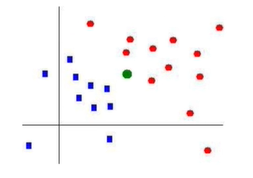

**Mesela bu örneğe göre 2 farklı sınıfımız var. Diyelim Sigara içenler ve içmeyenler. Yeni eklenen yeşil noktayı(yani yeni veri) biz en yakın komşuya göre sınıflandıracağız. Yani kırmızı noktalar mı daha yakın yoksa mavi olanlar mı? onu bulacağız.**

**En yakın K komşu dediğimiz şey aslında kaç komşu olduğu. K kaç ise o kadar komşuya bakıyoruz(diyelim K = 3, o zaman en yakın 3 komşuya bakıyoruz)**

**Bu 3 komşudan 2 tanesi kırmızı dersek eğer bu yeni veriyi kırmızılar arasına ekleyeceğiz.**

**Bu yakınlık ölçme işi öklid algoritmasına dayanıyor. İki mesafe arasındaki fark alınıp kareleri toplamının karekökü hesaplanacak. Tabi bu ölçüm algoritmaları değişebilir.**

**K çift bir sayı ise, yani iki sınıf arasındaki değerlerde eşitlik varsa; aradaki mesafenin daha az olduğu tarafta sınıflandırılır.**

**İki çeşit değerlendirilebilir. Lazy Learning, veri geldiğindeki en yakın yeri bulup yerleştiriyor yanş herhangi bir öğrenme yapmıyor. Eager Learning, veri noktalarına göre alanlar belirliyor. Buraya düşse şu sınıfta olur gibi noktalar belirliyor yani öğrenme yapıyor. Sonra elimizdeki gerçek verileri unutup öğrendiği verilere göre sınıflandırma yapıyor.**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [3]:
datas = pd.read_csv("veriler.csv")
datas

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e


In [4]:
bky = datas.iloc[:, 1:4]
cins = datas.iloc[:, -1]

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(bky, cins, test_size=0.33, random_state=0)
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [7]:
#KNN algoritmasını kullanacağız. n_neighbors ile K'nın 5 olduğnu söyledik.
#mertics = minkowski ile minkowski algoritmasına göre KNN algoritmasını çalıştıracağımızı söyledik. 
#Bu değerleri bu nesne default olarak alıyor. Ayrıca yazmasak da K'yı 5 alacak, algoritmayı minkowski yapacak
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
#sonra knn'i eğitiyoruz.
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [8]:
ypred = knn.predict(xtest)
print(ypred)
print(ytest)

['e' 'e' 'e' 'e' 'k' 'e' 'e' 'k']
20    k
10    k
14    k
13    k
1     e
21    k
11    k
19    k
Name: cinsiyet, dtype: object


In [9]:
#görüldüğü gibi 2 tane başarı var. Outlierları çıkartırsak başarımız artar!
cm = confusion_matrix(ytest, ypred)
cm

array([[0, 1],
       [6, 1]], dtype=int64)

**Bu algoritmaya göre sınıflandırma yapıldığı zaman: diyelim 3 bölge var. mavi, yeşil, kırmızı. Mavi alanın içerisinde yeşil outlierlar olabilir ancak bu yeşiller mavi içerisinde bile olsa kendi özerk bölgeleri olur.**

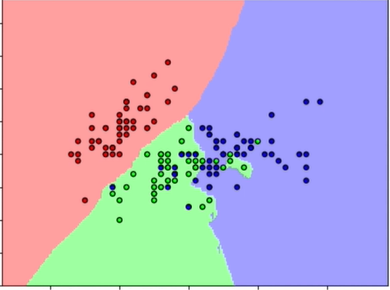

**Görüldüğü gibi mavi bölgenin içinde yeşiller, yeşil bölgenin içine maviler var. Biz K'yı 5 aldık ancak bazı durumlarda K'yı ne kadar yüksek alırsak doğru sonuca ulaşabileceği gibi bazı durumlarda ise K'yı düşük almak doğru sonuca daha çok yaklaştırır.**

In [10]:
knn1 = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn1.fit(xtrain, ytrain)
ypred = knn1.predict(xtest)
print(ypred)
print(ytest)

['k' 'k' 'e' 'k' 'e' 'k' 'k' 'k']
20    k
10    k
14    k
13    k
1     e
21    k
11    k
19    k
Name: cinsiyet, dtype: object


In [11]:
cm1 = confusion_matrix(ytest, ypred)
cm1

array([[1, 0],
       [1, 6]], dtype=int64)

**Görüldüğü gibi sonucun doğruluğu arttı. Sadece tek hatamız var artık. Komşu sayısını azaltarak başarımız arttı. Her zaman çok fazla komşu almak her zaman başarı arttırmaz. Doğru olan şey, doğru veriler ve doğru algoritmaları çalıştırmak.**